In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

In [54]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [55]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

In [ ]:
metrics.plot_roc_curve(clf, X_test, y_test) 

In [45]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=4)
model = RandomForestClassifier(max_depth=80, max_features=4, min_samples_leaf=4,
                       n_estimators=200, random_state=1)
model.fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[11,  8],
       [ 4, 13]])

In [57]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=4)
model = MLPClassifier(activation='relu', hidden_layer_sizes= 2, learning_rate='constant', max_iter=200, solver='lbfgs')

model.fit(X_trainval, y_trainval)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[12,  7],
       [ 5, 12]])

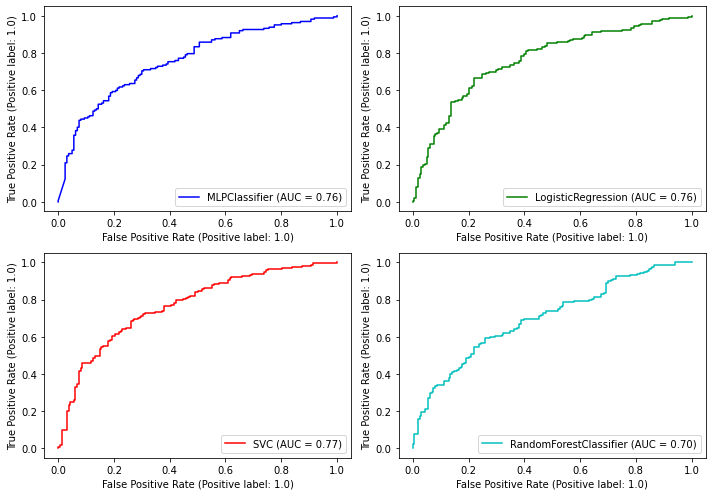

In [115]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(10,7))

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=4)
model = MLPClassifier(activation='relu', hidden_layer_sizes= 2, learning_rate='constant', max_iter=200, solver='lbfgs')

model.fit(X_trainval, y_trainval)
plot_roc_curve(model, X_trainval, y_trainval, ax=axs[0,0],color='b')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=3)
model = LogisticRegression(C=1, random_state=1, solver='liblinear') 
model.fit(X_trainval, y_trainval)
plot_roc_curve(model, X_trainval, y_trainval, ax=axs[0,1],color='g')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=20)
model = SVC(C=0.2, gamma=1, kernel='linear', random_state=1) 
model.fit(X_trainval, y_trainval)
plot_roc_curve(model, X_trainval, y_trainval, ax=axs[1,0],color='r')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=9)
model =RandomForestClassifier(max_depth=80, max_features=4, min_samples_leaf=4,
                       n_estimators=200, random_state=1) 
model.fit(X_test, y_test)
plot_roc_curve(model, X_trainval, y_trainval, ax=axs[1,1],color='c')

plt.tight_layout()
plt.savefig('roccurves.pdf', dpi=300)
plt.show()

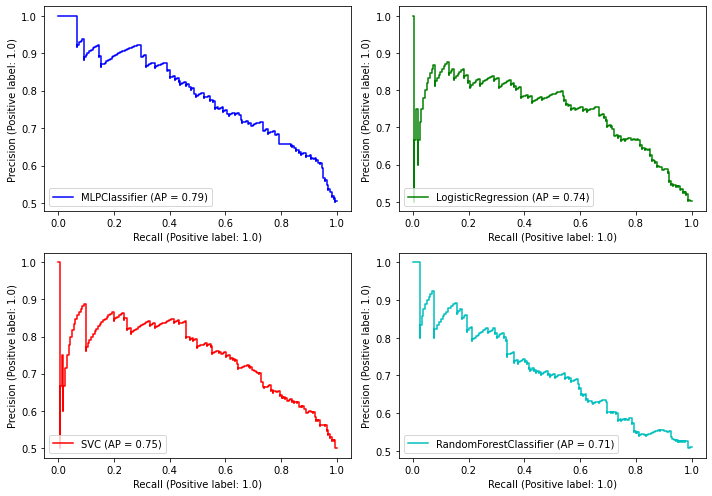

In [129]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(10,7))

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=4)
model = MLPClassifier(activation='relu', hidden_layer_sizes= 2, learning_rate='constant', max_iter=200, solver='lbfgs')

model.fit(X_trainval, y_trainval)
plot_precision_recall_curve(model, X_trainval, y_trainval, ax=axs[0,0],color='b')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=3)
model = LogisticRegression(C=1, random_state=1, solver='liblinear') 
model.fit(X_trainval, y_trainval)
plot_precision_recall_curve(model, X_trainval, y_trainval, ax=axs[0,1],color='g')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=20)
model = SVC(C=0.2, gamma=1, kernel='linear', random_state=1) 
model.fit(X_trainval, y_trainval)
plot_precision_recall_curve(model, X_trainval, y_trainval, ax=axs[1,0],color='r')

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=9)
model =RandomForestClassifier(max_depth=80, max_features=4, min_samples_leaf=4,
                       n_estimators=200, random_state=1) 
model.fit(X_test, y_test)
plot_precision_recall_curve(model, X_trainval, y_trainval, ax=axs[1,1],color='c')

plt.tight_layout()
plt.savefig('roccurves.pdf', dpi=300)
plt.show()